In [0]:
from keras.layers import GlobalAveragePooling2D,Activation,Flatten,Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
import keras.backend as K
import cv2

import numpy as np
import pandas as pd
from keras.utils import np_utils

In [2]:
pip install image-classifiers

     |████████████████████████████████| 81kB 6.8MB/s 


In [3]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-cpe1o569
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-cpe1o569
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-24xzzfny/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [4]:
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((32, 32, 3), weights='imagenet', include_top=False)

W0702 11:52:27.864984 140712328230784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 11:52:27.925219 140712328230784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 11:52:27.926423 140712328230784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 11:52:27.928050 140712328230784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 11:52:27.930557 140712

44924928/44920640 [==============================] - 2s 0us/step


In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
num_classes = 10
batch_size = 128
epochs = 5

In [9]:
# add a global spatial average pooling layer
last_layer = model.output
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(last_layer)
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(x)
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(x)
x = Conv2D(num_classes, (1,1), strides=(1,1), use_bias=False)(x)
x = GlobalAveragePooling2D()(x)
# a softmax layer for 10 classes
out = Activation('softmax')(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  after removing the cwd from sys.path.


In [0]:
# this is the model we will train
custom_resnet_model = Model(inputs=model.input, outputs=out)

In [11]:
custom_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [12]:
custom_resnet_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 11:58:56.397459 140712328230784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
# CIFAR10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Importing CIFAR10 dataset from Keras.
from keras.datasets import cifar10

# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

# Setting the count, number of channels, rows and columns of training images
num_train, img_channels, img_rows, img_cols =  train_features.shape

# Setting the count of test images
num_test, _, _, _ =  test_features.shape

# Setting number of classes (10)
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


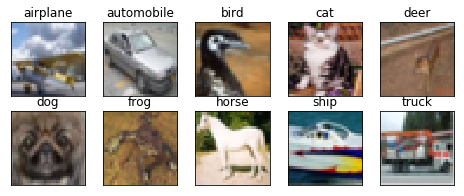

In [57]:
# Setting up the class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plotting an image from each of the 10 classes
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Pixel normalization for training images
train_features = train_features.astype('float32')/255

# Pixel normalization for test images
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/EIP_Assignment5_Modified:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [17]:
custom_resnet_model.fit(train_features, train_labels,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_features, test_labels),
              shuffle=False,
              callbacks=[checkpoint])

W0702 12:00:03.508620 140712328230784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 72s 1ms/step - loss: 1.5954 - acc: 0.4730 - val_loss: 1.1013 - val_acc: 0.6075

Epoch 00001: val_acc improved from -inf to 0.60750, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.608.hdf5
Epoch 2/5
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9285 - acc: 0.6702 - val_loss: 0.8474 - val_acc: 0.7054

Epoch 00002: val_acc improved from 0.60750 to 0.70540, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:002-val_acc:0.705.hdf5
Epoch 3/5
50000/50000 [==============================] - 62s 1ms/step - loss: 0.7211 - acc: 0.7460 - val_loss: 0.7652 - val_acc: 0.7359

Epoch 00003: val_acc improved from 0.70540 to 0.73590, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:003-val_acc:0.736.hdf5
Epoch 4/5
50000/50000 [==============================] - 62s 1ms/step - loss: 0.5849 - acc: 0.7947 - val_loss:

In [18]:
custom_resnet_model.fit(train_features, train_labels,
              batch_size=batch_size,
              epochs=15,
              validation_data=(test_features, test_labels),
              shuffle=False,
              callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 62s 1ms/step - loss: 0.3550 - acc: 0.8805 - val_loss: 0.7770 - val_acc: 0.7601

Epoch 00001: val_acc improved from 0.75740 to 0.76010, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.760.hdf5
Epoch 2/15
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2425 - acc: 0.9240 - val_loss: 0.8709 - val_acc: 0.7580

Epoch 00002: val_acc did not improve from 0.76010
Epoch 3/15
50000/50000 [==============================] - 61s 1ms/step - loss: 0.1397 - acc: 0.9620 - val_loss: 1.0048 - val_acc: 0.7567

Epoch 00003: val_acc did not improve from 0.76010
Epoch 4/15
50000/50000 [==============================] - 61s 1ms/step - loss: 0.0659 - acc: 0.9863 - val_loss: 1.1565 - val_acc: 0.7536

Epoch 00004: val_acc did not improve from 0.76010
Epoch 5/15
50000/50000 [==============================] - 62s 1ms/step - loss: 0.0286 - acc: 0.9959 - va

In [0]:
#Loading the best weights for prediction
custom_resnet_model.load_weights('/content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.760.hdf5')

In [0]:
y_pred = custom_resnet_model.predict(test_features)

In [0]:
y_pred = np.argmax(y_pred, axis=1)

In [0]:
# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
test_labels = test_labels.reshape(test_labels.shape[0],)

In [0]:
incorrect = np.nonzero(y_pred != test_labels)

In [37]:
len(incorrect[0])

2399

In [0]:
top_incorrect = incorrect[0][0:50]

In [39]:
top_incorrect

array([  3,  12,  24,  35,  42,  48,  51,  52,  57,  58,  59,  61,  74,
        76,  77,  78,  85,  86,  87, 106, 118, 119, 121, 125, 128, 137,
       139, 143, 145, 147, 149, 158, 162, 167, 169, 170, 172, 178, 184,
       186, 188, 192, 193, 195, 201, 210, 221, 223, 224, 225])

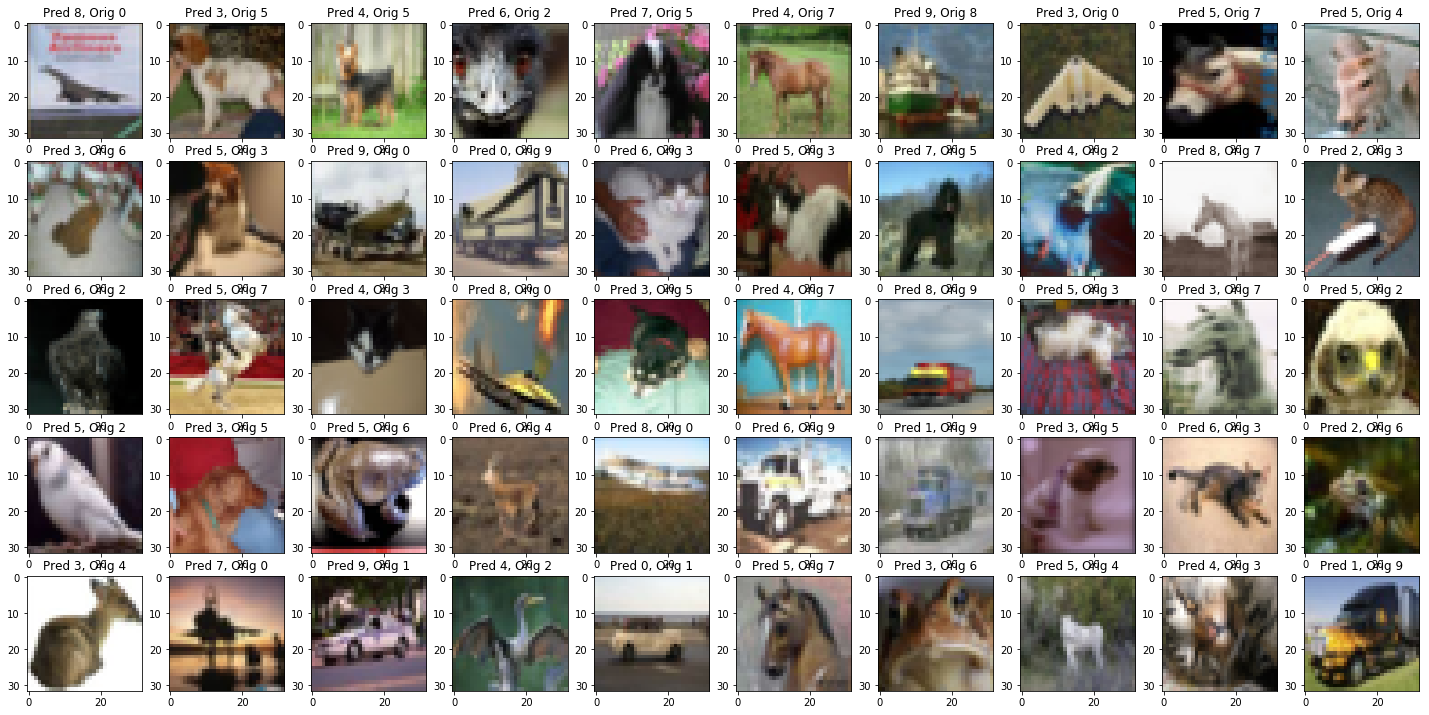

In [48]:
import matplotlib.pyplot as plt
#import numpy as np

#plt.figure(0)
plt.figure(figsize = (25,25)) 
plots = []
count = 0
for i in range(5):
    for j in range(10):
        ax = plt.subplot2grid((10,10), (i,j))
        plt.imshow(test_features[top_incorrect[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        plt.title("Pred {}, Orig {}".format(y_pred[top_incorrect[count]], test_labels[top_incorrect[count]]))
        count = count+1
plt.show()

In [0]:
#Function to get actual class names
def getClassName(classNumber):
  for i in range(len(class_names)):
    if(classNumber == i):
      className = class_names[i]
  return className

In [0]:
#Function to plot original image and GradCAM image
def plotOrigGradCam(image_number):
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

  # Pixel normalization for test images
  test_features = test_features.astype('float32')/255

  # convert class labels to binary class labels
  test_labels = np_utils.to_categorical(test_labels, num_classes)
  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = custom_resnet_model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = custom_resnet_model.output[:, class_idx]
  last_conv_layer = custom_resnet_model.get_layer("zero_padding2d_15")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([custom_resnet_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([test_features])
  for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  plt.title("Original: " + getClassName(test_labels[image_number])+"    Predicted: " + getClassName(class_idx))
  plt.imshow(img)
  plt.show()
  plt.imshow(superimposed_img)
  plt.show()
  cv2.waitKey(0)

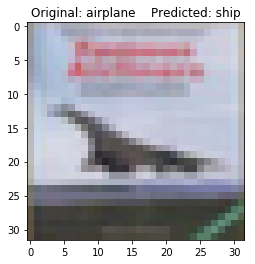

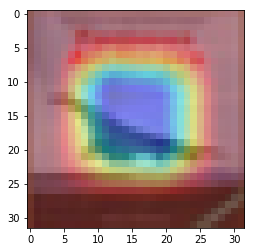

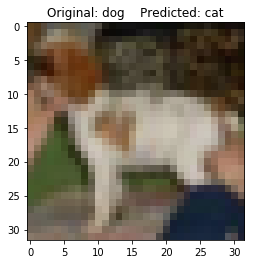

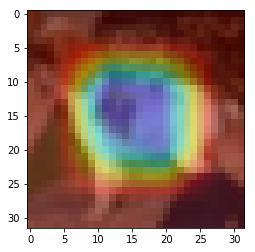

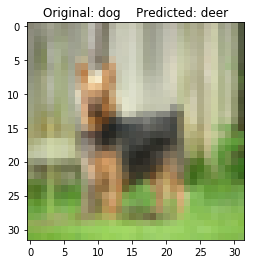

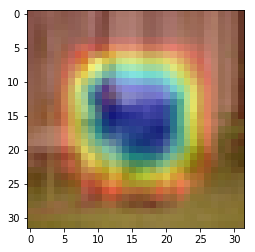

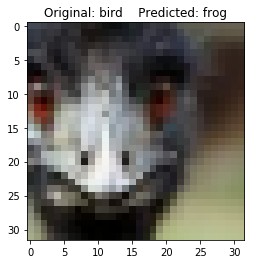

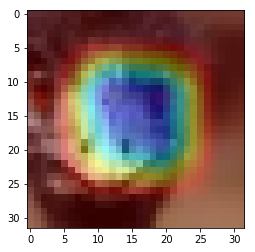

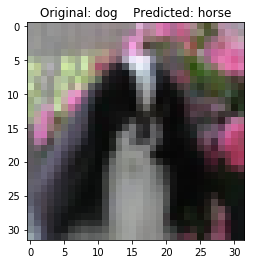

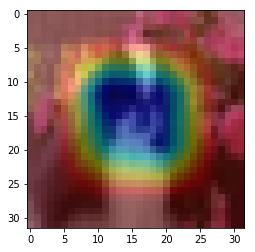

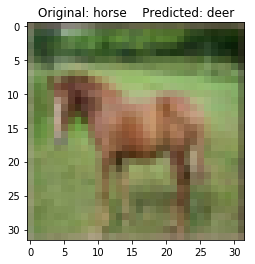

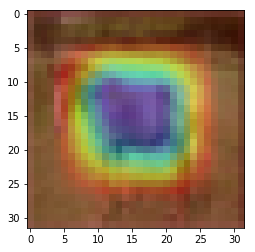

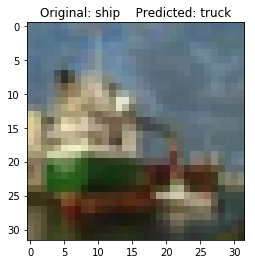

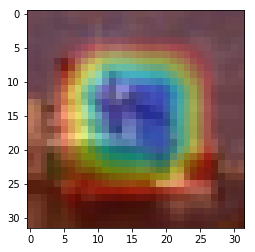

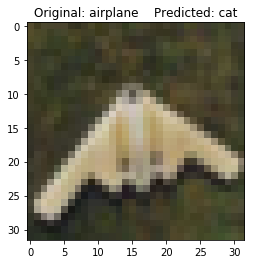

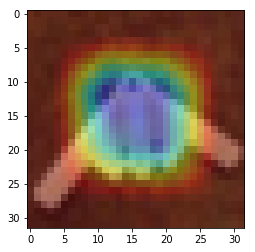

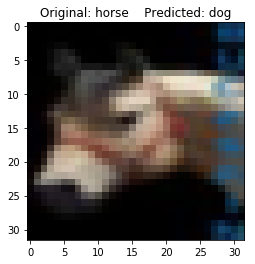

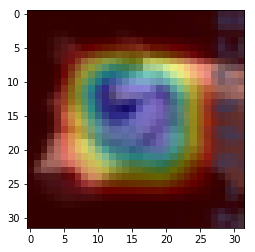

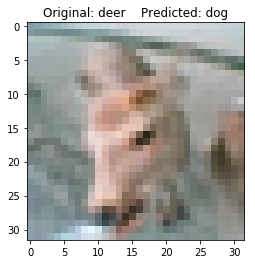

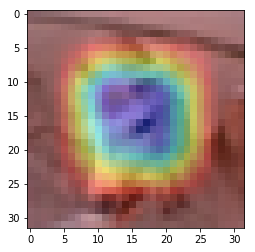

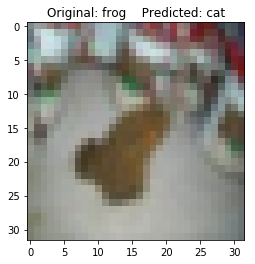

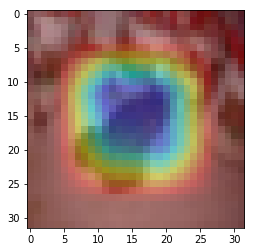

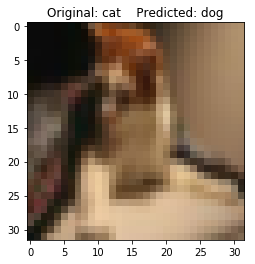

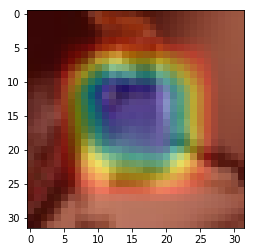

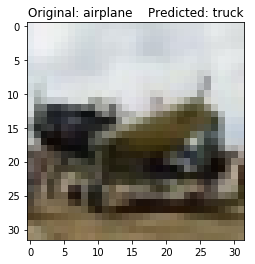

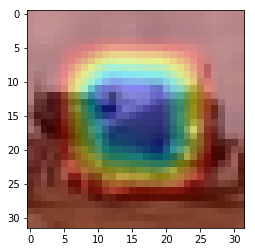

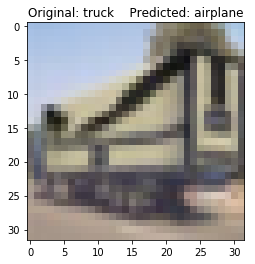

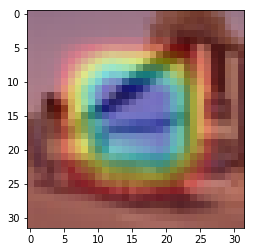

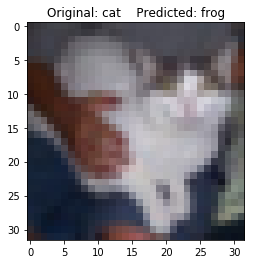

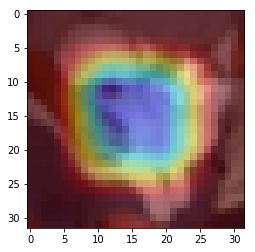

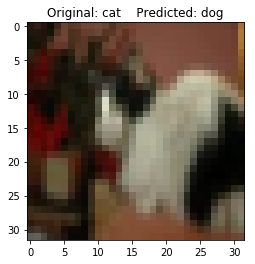

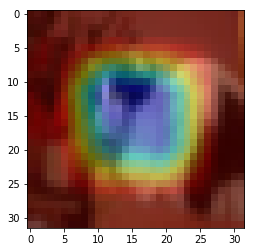

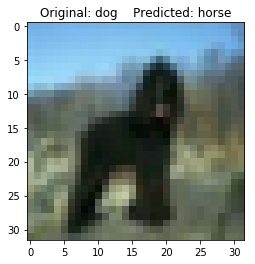

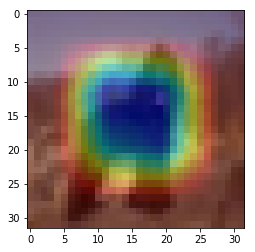

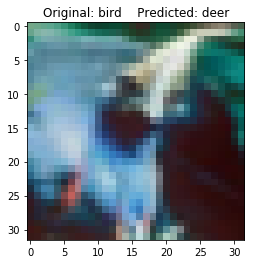

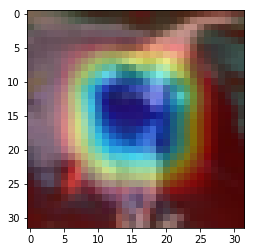

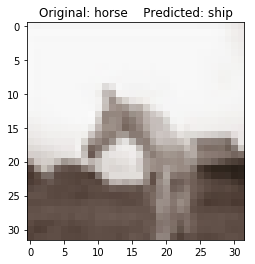

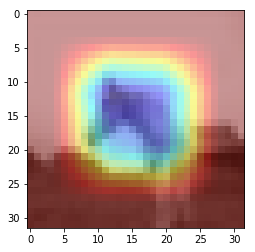

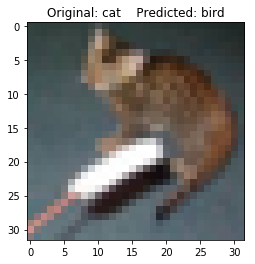

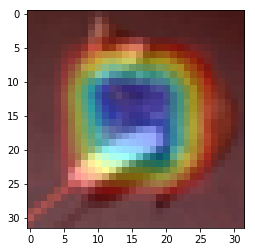

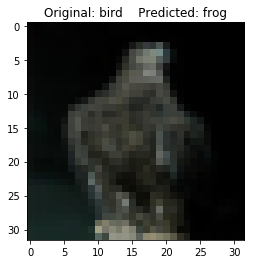

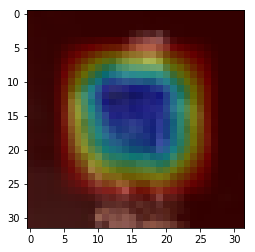

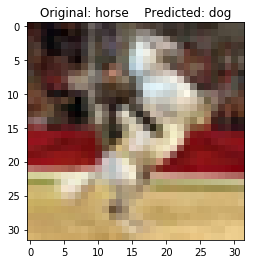

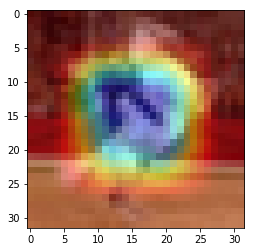

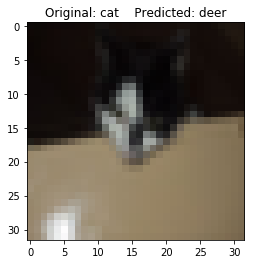

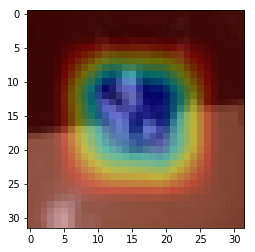

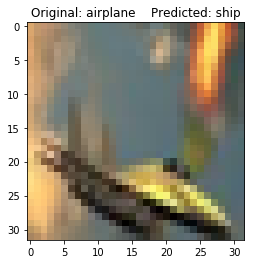

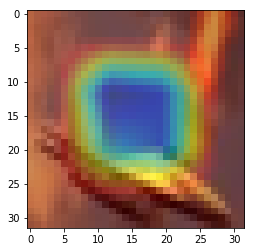

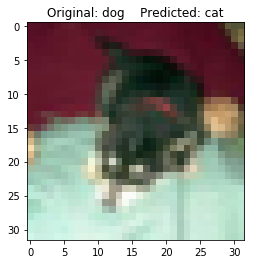

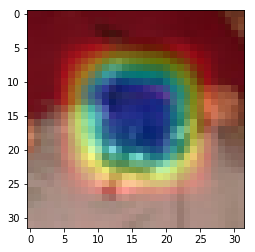

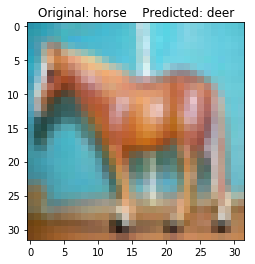

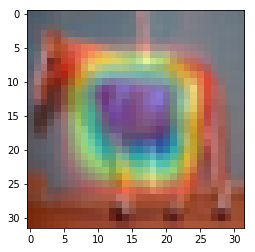

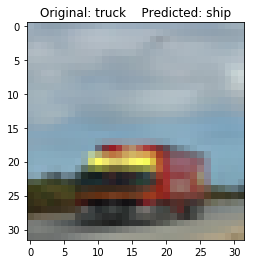

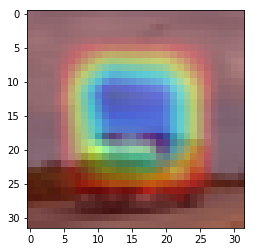

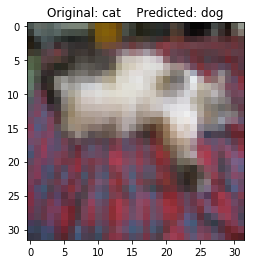

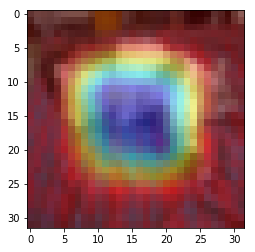

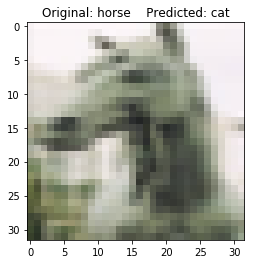

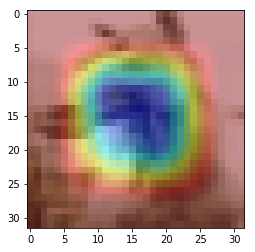

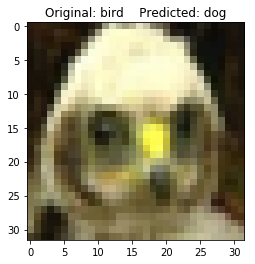

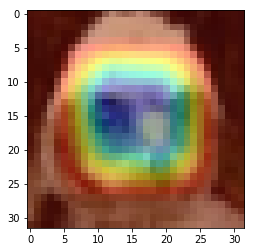

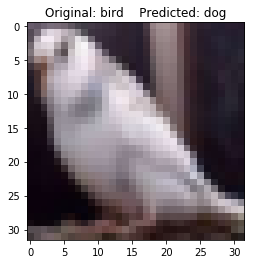

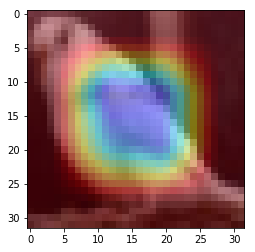

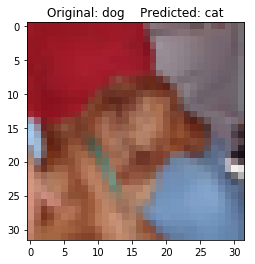

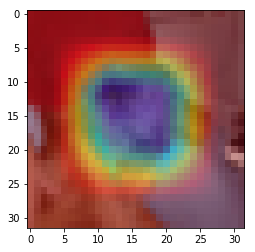

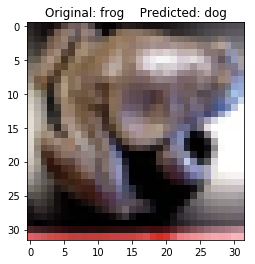

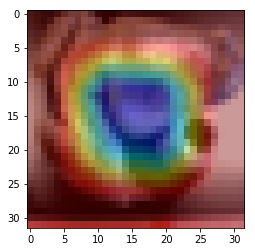

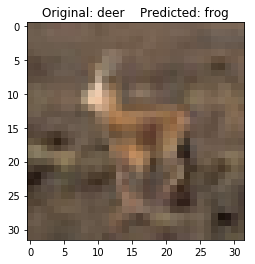

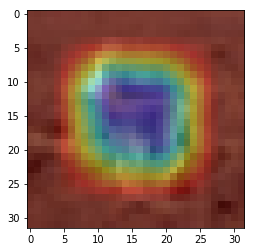

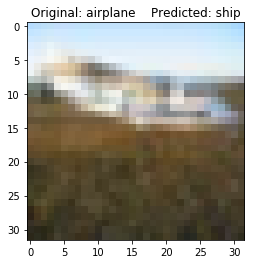

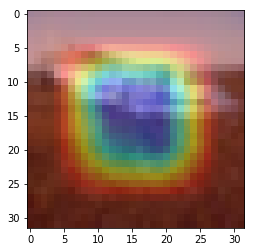

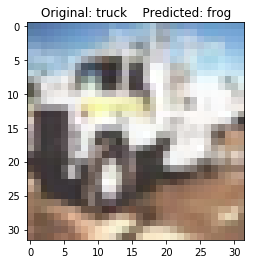

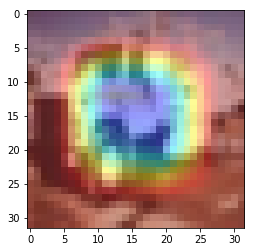

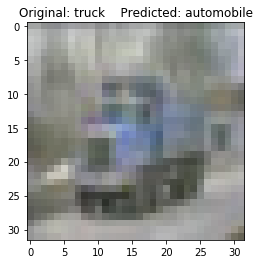

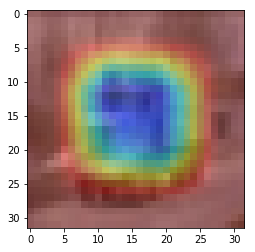

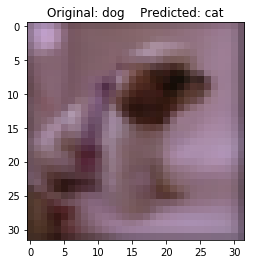

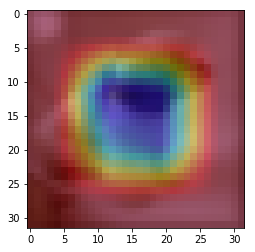

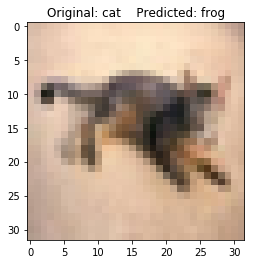

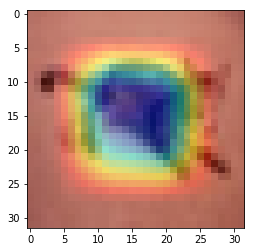

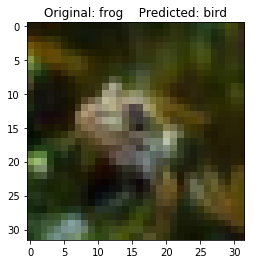

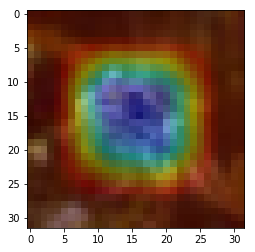

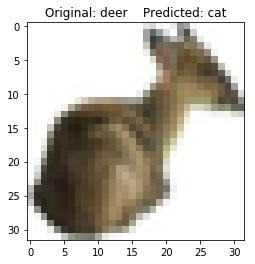

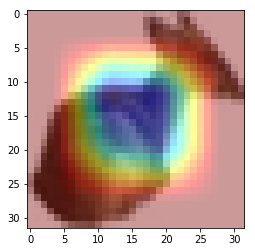

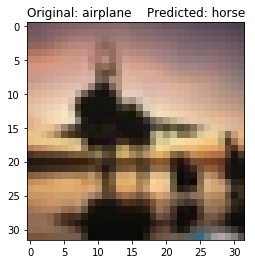

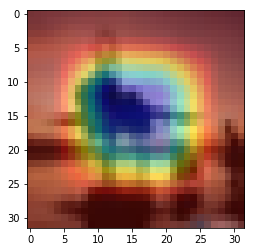

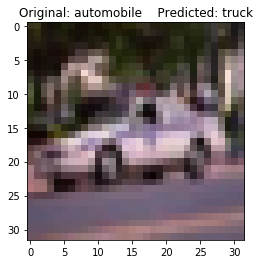

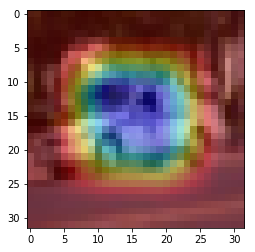

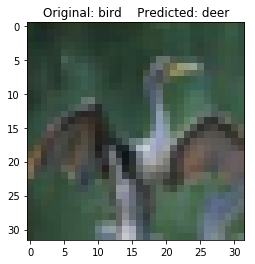

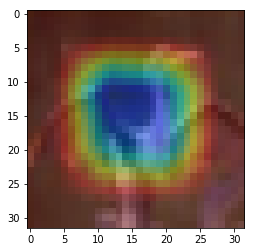

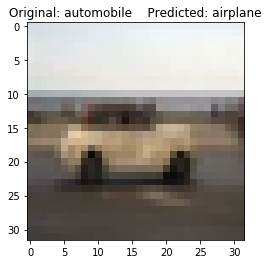

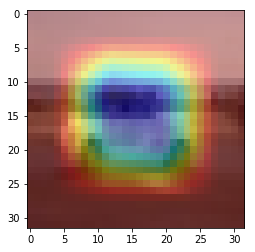

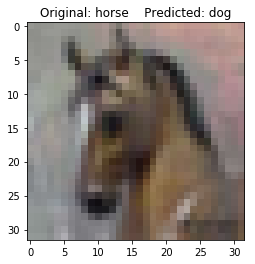

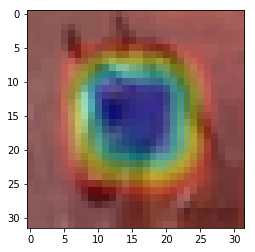

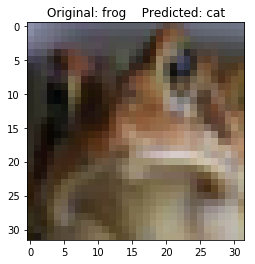

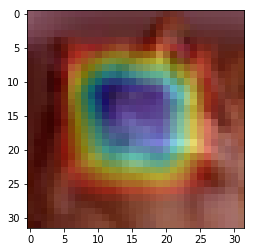

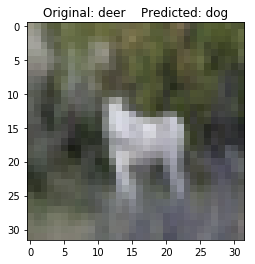

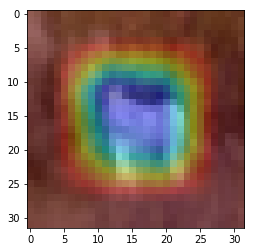

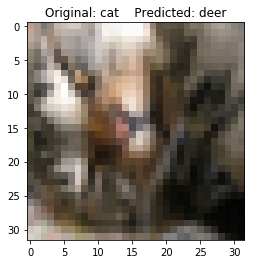

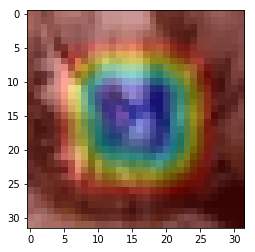

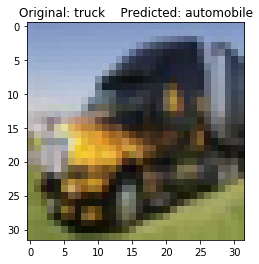

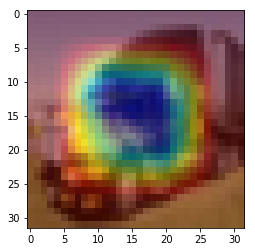

In [67]:
#Image numbers of selected images
#selected_image_numbers = [127,162,165,169]

#Running a loop to plot original and GradCAM image for all the selected images
for i in range(len(top_incorrect)):  
  plotOrigGradCam(top_incorrect[i])